In [34]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
##from sklearn.cross_validation import train_test_split
import seaborn as sns

data = pd.read_csv('OnlineNewsPopularity.csv', header=0)
data = data.dropna()

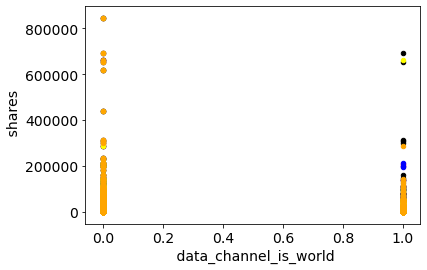

In [35]:
x1=data[' data_channel_is_lifestyle'].values
x2=data[' data_channel_is_entertainment'].values
x3=data[' data_channel_is_bus'].values
x4=data[' data_channel_is_socmed'].values
x5=data[' data_channel_is_tech'].values
x6=data[' data_channel_is_world'].values
y=data[' shares'].values

ax= plt.gca()
data.plot(kind='scatter',y=' shares',x=' data_channel_is_lifestyle',color='red',ax=ax)
data.plot(kind='scatter',y=' shares',x=' data_channel_is_entertainment',color='blue',ax=ax)
data.plot(kind='scatter',y=' shares',x=' data_channel_is_bus',color='black',ax=ax)
data.plot(kind='scatter',y=' shares',x=' data_channel_is_socmed',color='grey',ax=ax)
data.plot(kind='scatter',y=' shares',x=' data_channel_is_tech',color='yellow',ax=ax)
data.plot(kind='scatter',y=' shares',x=' data_channel_is_world',color='orange',ax=ax)
plt.show()

In [36]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [37]:
input= data[[' shares']].values
results1= data[[' data_channel_is_lifestyle']].values 
results2= data[[' data_channel_is_entertainment']].values
results3= data[[' data_channel_is_bus']].values 
results4= data[[' data_channel_is_socmed']].values 
results5= data[[' data_channel_is_tech']].values 
results6= data[[' data_channel_is_world']].values

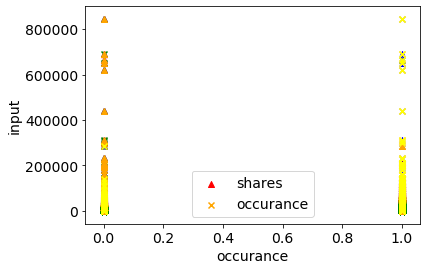

In [38]:
ax= plt.gca()
ax.scatter(results1==1,input,marker="^",color='red')
ax.scatter(results1==0,input,marker="x",color='orange')
ax.scatter(results2==1,input,marker="^",color='purple')
ax.scatter(results2==0,input,marker="x",color='yellow')
ax.scatter(results3==1,input,marker="^",color='blue')
ax.scatter(results3==0,input,marker="x",color='green')
ax.scatter(results4==1,input,marker="^",color='black')
ax.scatter(results4==0,input,marker="x",color='white')
ax.scatter(results5==1,input,marker="^",color='grey')
ax.scatter(results5==0,input,marker="x",color='pink')
ax.scatter(results6==1,input,marker="^",color='orange')
ax.scatter(results6==0,input,marker="x",color='yellow')

ax.set(ylabel='input', xlabel='occurance')
ax.legend(['shares','occurance'])
plt.show()

In [39]:
def log (z):
   return  1 / (1 + np.exp(-z))

def cost_r(theta, x, y):
      m = len(y)
      y_predict = log(np.dot(x,theta))
      error = (y*np.log(y_predict))+ (1-y)*np.log(1-y_predict)
      cost= -1/m * sum(error)
      gradient= 1/m * np.dot(x.transpose(), (y_predict - y))
      return cost[0], gradient

In [79]:
#gets the dimension of input
rows = input.shape[0]
cols = input.shape[1]

#since shares correspond to occurances of words. all should get ones. it appeared for all rows.
X= np.append(np.ones((rows,1)), input, axis = 1)

#since the results are 0 or 1. 
#y dependence on X is same for result1, results2, results3, results4, result5, result6
#just used one of the six results. 
y= results1.reshape(rows,1)

theta_init=np.zeros((cols+1,1))
cost, gradient = cost_r(theta_init,X,y)

print(X,y)
print('Cost at inital', cost)
print('gradient at inital',gradient)

[[1.00e+00 5.93e+02]
 [1.00e+00 7.11e+02]
 [1.00e+00 1.50e+03]
 ...
 [1.00e+00 1.90e+03]
 [1.00e+00 1.10e+03]
 [1.00e+00 1.30e+03]] [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Cost at inital 0.6931471805593674
gradient at inital [[4.47053779e-01]
 [1.50273557e+03]]


In [80]:
def gradient_descent(x,y,theta,alpha,iterations):
    costs=[]
    for i in range(iterations):
        cost,gradient= cost_r(theta,x,y)
        theta-=(alpha*gradient)
        costs.append(cost)
    return theta, costs


In [81]:
theta,cost = gradient_descent(X,y,theta_init,0.05,200)

print ( 'gradient results theta:',theta)
print('resulting cost', cost[0])

/Users/davidgae/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/davidgae/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/Users/davidgae/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


gradient results theta: [[-0.04553779]
 [-2.79840359]]
resulting cost 0.6931471805593674


In [82]:
#x_boundary = np.array([np.min(X[:,1]),np.max(X[:,1])])
#y_boundary =(theta[0]  * x_boundary)/theta[0]
#sns.lineplot(x= x_boundary, y= y_boundary, color= 'blue')

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=15)
print(X_train.shape)
print(X_test.shape)
#print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
#print(y_valid.shape)
log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')
log_reg.fit(X_train, y_train)
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_
#Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

(35679, 2)
(3965, 2)
(35679, 1)
(3965, 1)
The Training Accuracy is:  0.9471397740968076
The Testing Accuracy is:  0.946279949558638
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     33793
         1.0       0.00      0.00      0.00      1886

   micro avg       0.95      0.95      0.95     35679
   macro avg       0.47      0.50      0.49     35679
weighted avg       0.90      0.95      0.92     35679



/Users/davidgae/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidgae/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [85]:
#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier()
#rf.fit(X_train, y_train)
#model_predictions = rf.predict(X_test)
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#print(confusion_matrix(y_test,model_predictions))
#print(classification_report(y_test,model_predictions))
#print("The Accuracy is: ", accuracy_score(y_test, model_predictions))